<a href="https://colab.research.google.com/github/gianlukas/modellazioneSistIng/blob/main/4_1_Derivate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Corso di Modellazione dei Sistemi Ingegneristici

prof. Gianluca Solazzo

email: gianluca.solazzo@unisalento.it

<a target="_blank" href="https://colab.research.google.com/github/mikexcohen/MasterMathByCodingInPython/blob/main/algebra_1/mathWithPython_algebra1_addPolys.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Ultimi esercizi sui limiti



In [ ]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display,Math

In [ ]:
x = sym.symbols('x')

# la funzione
f = x**3

# calcolo il limite
lim_pnt = 1.5
lim = sym.limit(f,x,lim_pnt)

display(Math('\\lim_{x\\to %g} %s = %g' %(lim_pnt,sym.latex(f),lim)))

<IPython.core.display.Math object>

Valuto una funzione matematica data in un certo intervallo e la visualizzo graficamente.

Per farlo, uso la funzione lambdify() per valutare la funzione simbolica f in valori numerici.

Questo passaggio è necessario poiché le funzioni sympy non possono essere valutate direttamente con array numpy

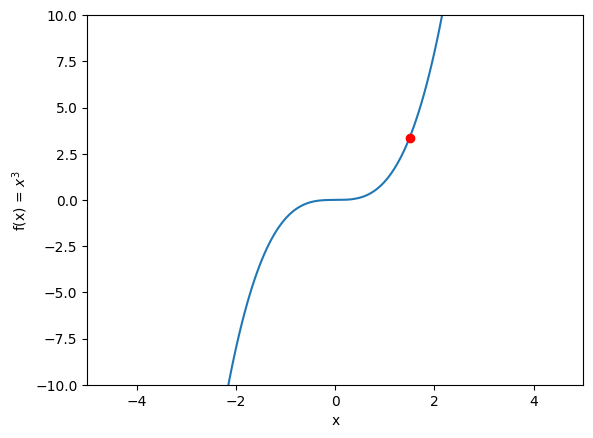

In [ ]:
# evaluate the function in a range
x_val = np.linspace(-5,5,200) # array di 200 punti equidistanti nell'intervallo da -5 a 5, che rappresenteranno i valori di x su cui valutare la funzione.

f_x = sym.lambdify(x,f) # valuto numericamente la funzione simbolica

# show it in a plot
plt.plot(x_val,f_x(x_val))

# make the plot look a bit nicer
plt.plot(lim_pnt,lim,'ro')
plt.xlim([-5,5])
plt.ylim([-10,10])
plt.xlabel('x')
plt.ylabel('f(x) = $%s$' %sym.latex(f))

plt.show()

<IPython.core.display.Math object>

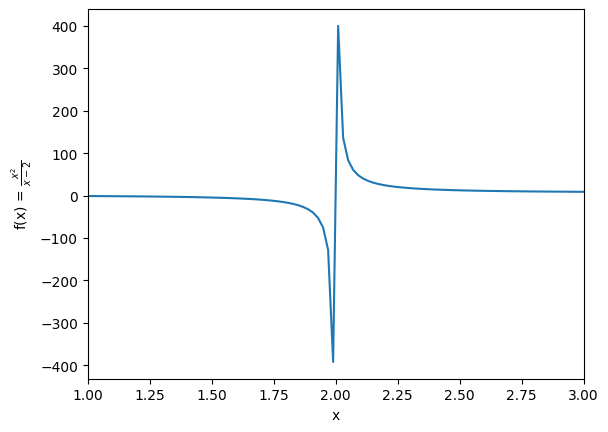

In [ ]:
# definisco la mia funzione simbolica
f = (x**2)/(x-2)
f_x = sym.lambdify(x,f) # e la valuto numericamente

x_values = np.linspace(1,3,100)

# calcolo il limite
lim_pnt = 2
lim = sym.limit(f,x,lim_pnt,dir='+')

display(Math('\\lim_{x\\to %g^+} %s = %g' %(lim_pnt,sym.latex(f),lim)))

# show it in a plot
plt.plot(x_values ,f_x(x_values))

# make the plot look a bit nicer
plt.plot(lim_pnt,lim,'ro')
plt.xlim([1,3])
plt.xlabel('x')
plt.ylabel('f(x) = $%s$' %sym.latex(f))

plt.show()

## Esercizio

Esercitiamoci sulla valutazione numerica di una funzione simbolica.

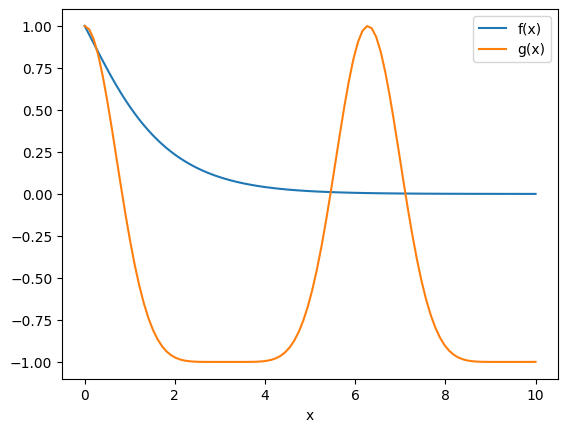

In [ ]:
# definiamo le funzioni
fx = sym.sqrt(x+1)*sym.exp(-x)
gx = sym.cos(x + sym.sin(x))

## valutiamole numericamente
fxx = sym.lambdify(x,fx)
gxx = sym.lambdify(x,gx)

xx = np.linspace(0,10,100)

# grafichiamo
plt.plot(xx,fxx(xx),label='f(x)')
plt.plot(xx,gxx(xx),label='g(x)')

plt.xlabel('x')
plt.legend()

plt.show()

In [ ]:
# calcoliamo il limite separatamente a x=5
lim_pnt = 5
lim_fx = sym.limit(fx,x,lim_pnt)
lim_gx = sym.limit(gx,x,lim_pnt)

display(Math('\\frac{\\lim_{x\\to %g} f(x)}{\\lim_{x\\to %g} g(x)} = \\frac{%g}{%g} = %g' \
             %(lim_pnt,lim_pnt,lim_fx,lim_gx,lim_fx/lim_gx)))

# calcoliamo il limite del rapporto fx/gx
lim_fg = sym.limit(fx/gx,x,lim_pnt)

display(Math('\\lim_{x\\to %g} \\frac{f(x)}{g(x)} = %g' %(lim_pnt,lim_fg)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Derivate
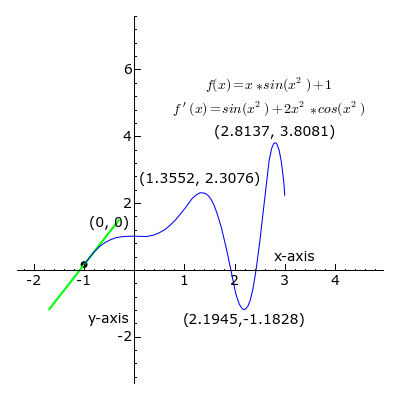

Un modo semplice per capire cosa sia la derivata è guardare al suo significato geometrico:
la derivata di una funzione f in un punto $x_0$ è la misura della pendenza (il coefficiente angolare, cioè la tangente trigonometrica dell’angolo fra la retta tangente e l’asse orizzontale) della retta tangente alla curva rappresentata dal grafico della funzione nel punto $(x_0,f(x_0))$.

In [ ]:
from sympy import *

x = symbols('x')

diff(log(x))

1/x

La funzione diff() è funzione membro dell’oggetto espressione e può essere richiamata come tale:
in questo caso accetta il solo argomento relativo alla variabile di derivazione.

L' esempio che abbiamo appena visto può essere riscritto anche con questa sintassi:

In [ ]:
log(x).diff()

1/x

In [ ]:
from sympy import *

x = symbols('x')

diff(x*sin(x**2)+1)

2*x**2*cos(x**2) + sin(x**2)

In [ ]:
from sympy import *
x = symbols('x')
v = log(x)*(sin(x)**2)
diff(v,x)

2*log(x)*sin(x)*cos(x) + sin(x)**2/x

Le derivate di ordine successivo possiamo calcolarle in due modi:
* inserendo più volte la variabile di derivazione, separando con virgole, come argomento di diff()
* inserendo il numero corrispondente al grado di derivazione dopo la variabile di derivazione, separato da virgola.

In [ ]:
# inserisco più volte la variabile di derivazione per calcolare la derivata seconda di x^3

from sympy import *

x = symbols('x')

diff(x**3, x, x)

6*x

In [ ]:
# inserisco il grado di derivazione dopo la variabile x per calcolare la derivata terza di x^3

from sympy import *

x = symbols('x')
y = symbols('y')

diff(y*x**3, x, 3)

6*y

#Continuità e differenziabilità

SymPy non ha una funzione diretta, ma con limit, diff, e Eq si può determinare la continuità e la differenziabilità di una funzione in modo simbolico e rigoroso.

##Continuità di una funzione

In [1]:
from sympy import symbols, Piecewise, limit, Eq, simplify

x = symbols('x')
f = Piecewise((x**2, x < 1), (2*x - 1, x >= 1))

# Punto da controllare
a = 1

# Limiti laterali
lim_sx = limit(f, x, a, dir='-')
lim_dx = limit(f, x, a, dir='+')
valore = f.subs(x, a)

# Verifica della continuità
continua = Eq(lim_sx, lim_dx) and Eq(lim_sx, valore)

print(f"Limite da sinistra: {lim_sx}")
print(f"Limite da destra: {lim_dx}")
print(f"Valore nel punto: {valore}")
print(f"Continuità in x = {a}: {continua}")


Limite da sinistra: 1
Limite da destra: 1
Valore nel punto: 1
Continuità in x = 1: True


##Derivabilità

In [2]:
from sympy import diff

# Derivate delle due parti
f1 = x**2
f2 = 2*x - 1

df1 = diff(f1, x)
df2 = diff(f2, x)

# Limiti laterali delle derivate
lim_der_sx = limit(df1, x, a)
lim_der_dx = limit(df2, x, a)

derivabile = Eq(lim_der_sx, lim_der_dx) and continua

print(f"Derivata da sinistra: {lim_der_sx}")
print(f"Derivata da destra: {lim_der_dx}")
print(f"Derivabilità in x = {a}: {derivabile}")


Derivata da sinistra: 2
Derivata da destra: 2
Derivabilità in x = 1: True


# Esercizi da risolvere utilizzando sympy, numpy e matplotlib

## Esercizio 1

Un componente elettronico si raffredda secondo la legge:

$$𝑇(𝑡)=30 + 70𝑒^{−0.05𝑡}* cos(0.1𝑡)$$

Calcolare:
*   la derivata $𝑇′(𝑡)$, cioè la velocità di raffreddamento istantanea
*   il valore di $𝑇′(𝑡)$ per t = 0
*   il grafico della funzione $T(t)$ e $T'(t)$

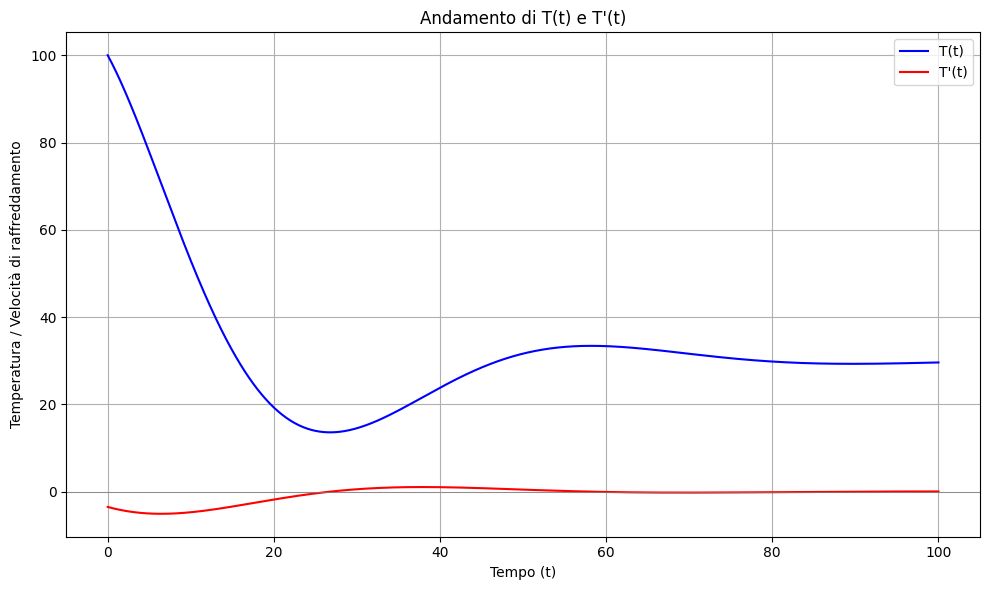

(-7.0*exp(-0.05*t)*sin(0.1*t) - 3.5*exp(-0.05*t)*cos(0.1*t), -3.50000000000000)

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definizione del simbolo e della funzione
t = sp.Symbol('t', real=True)
T = 30 + 70 * sp.exp(-0.05 * t) * sp.cos(0.1 * t)

# Calcolo della derivata simbolica
T_prime = sp.diff(T, t)

# Calcolo del valore della derivata in t = 0
T_prime_at_0 = T_prime.subs(t, 0).evalf()

# Conversione delle funzioni in funzioni numeriche per il grafico
T_func = sp.lambdify(t, T, modules=['numpy'])
T_prime_func = sp.lambdify(t, T_prime, modules=['numpy'])

# Valori numerici per il grafico
t_vals = np.linspace(0, 100, 1000)
T_vals = T_func(t_vals)
T_prime_vals = T_prime_func(t_vals)

# Creazione del grafico
plt.figure(figsize=(10, 6))
plt.plot(t_vals, T_vals, label='T(t)', color='blue')
plt.plot(t_vals, T_prime_vals, label="T'(t)", color='red')
plt.axhline(0, color='gray', linewidth=0.5)
plt.title("Andamento di T(t) e T'(t)")
plt.xlabel("Tempo (t)")
plt.ylabel("Temperatura / Velocità di raffreddamento")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

T_prime, T_prime_at_0

## Esercizio 2

La tensione ai capi di un circuito è descritta da:

$$𝑉(𝑡)=e^{−2𝑡}sin^{⁡2}(𝑡)$$

Calcolare:
* la derivata $V′(𝑡)$, per analizzare la velocità di variazione della tensione
*   il valore di $V′(𝑡)$ per $t = Pi/4$
*   il grafico della funzione $V(t)$ e $V'(t)$

## Esercizio 3
La posizione di un pistone nel motore è dato da:
$$s(t)=t^2*ln(1+t)$$

Calcolare:
* la derivata $s′(𝑡)$, per calcolare la velocità del pistone
*   il valore di $s′(𝑡)$ per $t = 1$
*   il grafico della funzione $s(t)$ e $s'(t)$ nello stesso plot

##Esercizio 4

Il carico distribuito su una trave nel tempo è dato da:
$$w(t)= \frac{sint}{1+e^t} $$

Calcolare:
* la derivata $w′(𝑡)$, per calcolare la variazione del carico nel tempo
*   il valore di $w′(𝑡)$ per $t = 0$
*   il grafico della funzione $w(t)$ e $w'(t)$ nello stesso plot

##Esercizio 5

La portata dell'acqua espressa in funzione del tempo è data da:
$$Q(t)= \sqrt(t)*arctan(t) $$

Calcolare:
* la derivata $Q′(𝑡)$, per determinare la velocità di variazione della portata
* il valore di $Q′(𝑡)$ per $t = 1$
* il grafico della funzione $Q(t)$ e $Q'(t)$ nello stesso plot

# Esercizio

La velocità v (t) di un corpo di massa m che cade nell’aria, se si assume la forza di attrito proporzionale alla velocità, è regolata dalla legge:

$$v(t) = \frac{mg}{h} \left(1 - e^{-\frac{ht}{m}}\right)$$


dove g è l’accelerazione di gravità e h il coeﬃciente d’attrito. Se, invece, si assume la forza di attrito proporzionale al quadrato della velocità, la velocità del corpo risulta:

$$v(t) =\sqrt{\frac{mg}{h}} * tan(h)* \sqrt{\frac{gh}{m}}*t$$

In entrambi i casi, trovare come varia la velocità nei primi istanti di caduta (ossia determinare il comportamento asintotico per t →0) e su quale valore si “stabilizza” (ossia calcolare il limite per t → +∞)